In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [48]:
(x_train, y_train), (x_test, y_test)=datasets.cifar10.load_data()
y_train
# len(np.unique(y_train))

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [64]:
# Basic parameters
epochs=50
batch_size=32
num_classes = 10
num_predictions = 20

In [50]:
print ('x_train shape',x_train.shape)
print ('x_train_samples',x_train.shape[0])
print ('x_test_samples',x_test.shape[0])

x_train shape (50000, 32, 32, 3)
x_train_samples 50000
x_test_samples 10000


In [51]:
label_dict={0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

In [52]:
label_dict

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [53]:
y_train[0][0]

6

Object: dog


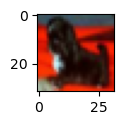

In [54]:
# Visulize the data
i=4878
print('Object:',label_dict[y_train[i][0]])
plt.figure(figsize=(1,1))
plt.imshow(x_train[i])

In [55]:
# One hot encoding for converting target into multiclass classification
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [56]:
x_train.shape[1:]

(32, 32, 3)

In [57]:
es=EarlyStopping(monitor='val_loss',patience=8,restore_best_weights=True)
check_point=ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

model=models.Sequential()
model.add(layers.Conv2D(32,(5,5),padding='same',activation='relu',input_shape=x_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
          
model.add(layers.Conv2D(64,(5,5),padding='same',activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.3))
          
model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.4))
          
model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.5))
          
model.add(layers.Flatten())
model.add(layers.Dense(512,activation=layers.LeakyReLU(alpha=0.01)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256,activation=layers.LeakyReLU(alpha=0.01)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(128,activation=layers.LeakyReLU(alpha=0.01)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
          
model.add(layers.Dense(10,activation='softmax'))

model.summary()

C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 32, 32, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 16, 16, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 4, 4, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │              

 Total params: 429,130 (1.64 MB)

 Trainable params: 426,890 (1.63 MB)

 Non-trainable params: 2,240 (8.75 KB)

In [58]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [59]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train=x_train/255
x_test=x_test/255

In [60]:
x_test.shape

(10000, 32, 32, 3)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.6635 - loss: 0.9780 - val_accuracy: 0.7077 - val_loss: 0.8315
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 104s 67ms/step - accuracy: 0.6673 - loss: 0.9646 - val_accuracy: 0.6135 - val_loss: 1.1123
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 101s 65ms/step - accuracy: 0.6738 - loss: 0.9511 - val_accuracy: 0.6796 - val_loss: 0.9291
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1275s 816ms/step - accuracy: 0.6790 - loss: 0.9327 - val_accuracy: 0.6611 - val_loss: 0.9843
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 64ms/step - accuracy: 0.6925 - loss: 0.9069 - val_accuracy: 0.7131 - val_loss: 0.8242
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 102s 65ms/step - accuracy: 0.6935 - loss: 0.8920 - val_accuracy: 0.7195 - val_loss: 0.8183
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 105s 67ms/step - accuracy: 0.7004 - loss: 0.8840 - val_accuracy: 0.6995 - val_loss: 0.8559
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 107s 69ms/step - accuracy:

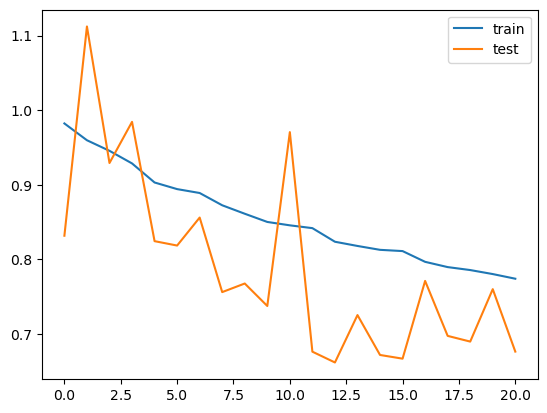

In [65]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=batch_size,verbose=1,epochs=epochs,callbacks=[es,check_point])
import pandas as pd
hist=pd.DataFrame(history.history)
print(hist)
plt.plot(hist.loss,label='train')
plt.plot(hist.val_loss,label='test')
plt.legend()
plt.show()

In [66]:
hist=pd.DataFrame(history.history)
print(hist.accuracy.max())
print(hist.val_accuracy.max())


0.7402999997138977
0.7692999839782715


In [67]:
score=model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7720 - loss: 0.6587
